# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# magic function to render plot
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# Create an empty list variable
lat_lngs = []
cities = []

# Create a random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Classify nearest city for each combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Distinct city will be added to cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

In [4]:
# List variable and counters
city_list = []
cloud_list = []
country_list = []
date_list = []
humidity_list = []
lats_list = []
lngs_list = []
temp_max_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
print("Beginning Data Retrieval ")
print("-------------------------------")

# Set parameters for for loop reference
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# For loop matching city names with city_list
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        cloud_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lats_list.append(response["coord"]["lat"])
        lngs_list.append(response["coord"]["lon"])
        temp_max_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        # Loop to get cities
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        
        else:
            index_counter = index_counter + 1
        
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
    
    # Except error to continue
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

Beginning Data Retrieval 
-------------------------------
City not found. Skipping...
Processing Record 1 of Set 1 : punta arenas
Processing Record 2 of Set 1 : east london
Processing Record 3 of Set 1 : hobart
Processing Record 4 of Set 1 : kapaa
Processing Record 5 of Set 1 : tuktoyaktuk
Processing Record 6 of Set 1 : saint george
Processing Record 7 of Set 1 : georgetown
Processing Record 8 of Set 1 : sitka
Processing Record 9 of Set 1 : port hardy
City not found. Skipping...
Processing Record 10 of Set 1 : cururupu
Processing Record 11 of Set 1 : rikitea
Processing Record 12 of Set 1 : koulikoro
Processing Record 13 of Set 1 : manzanillo
Processing Record 14 of Set 1 : tasiilaq
Processing Record 15 of Set 1 : leningradskiy
Processing Record 16 of Set 1 : hasaki
Processing Record 17 of Set 1 : mataura
City not found. Skipping...
Processing Record 18 of Set 1 : makakilo city
City not found. Skipping...
Processing Record 19 of Set 1 : jamestown
Processing Record 20 of Set 1 : nybro
Pr

Processing Record 35 of Set 4 : caravelas
Processing Record 36 of Set 4 : itaitinga
Processing Record 37 of Set 4 : yellowknife
Processing Record 38 of Set 4 : ha giang
Processing Record 39 of Set 4 : anadyr
Processing Record 40 of Set 4 : sur
Processing Record 41 of Set 4 : kotma
Processing Record 42 of Set 4 : antalaha
Processing Record 43 of Set 4 : hamilton
Processing Record 44 of Set 4 : mitha tiwana
Processing Record 45 of Set 4 : jutai
Processing Record 46 of Set 4 : fuyu
Processing Record 47 of Set 4 : grand gaube
Processing Record 48 of Set 4 : nikolskoye
Processing Record 49 of Set 4 : grindavik
Processing Record 50 of Set 4 : cap malheureux
Processing Record 0 of Set 5 : iquitos
Processing Record 1 of Set 5 : utrera
Processing Record 2 of Set 5 : port moresby
Processing Record 3 of Set 5 : yerbogachen
Processing Record 4 of Set 5 : bilma
Processing Record 5 of Set 5 : bull savanna
Processing Record 6 of Set 5 : gwanda
Processing Record 7 of Set 5 : katsuura
Processing Record

Processing Record 23 of Set 8 : goderich
Processing Record 24 of Set 8 : pisco
Processing Record 25 of Set 8 : salalah
Processing Record 26 of Set 8 : nanortalik
Processing Record 27 of Set 8 : kichera
Processing Record 28 of Set 8 : upington
Processing Record 29 of Set 8 : krasnoselkup
Processing Record 30 of Set 8 : yatou
Processing Record 31 of Set 8 : baker city
Processing Record 32 of Set 8 : zhaotong
Processing Record 33 of Set 8 : conway
Processing Record 34 of Set 8 : poum
Processing Record 35 of Set 8 : bud
Processing Record 36 of Set 8 : baykit
City not found. Skipping...
Processing Record 37 of Set 8 : svobodnyy
Processing Record 38 of Set 8 : lagoa
City not found. Skipping...
Processing Record 39 of Set 8 : baracoa
City not found. Skipping...
Processing Record 40 of Set 8 : shellbrook
Processing Record 41 of Set 8 : moussoro
Processing Record 42 of Set 8 : dombas
Processing Record 43 of Set 8 : lianzhou
Processing Record 44 of Set 8 : xuddur
Processing Record 45 of Set 8 : 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [44]:
# Export to .csv
weather_data = pd.DataFrame({
    "City" : city_list,
    "Lat" : lats_list,
    "Lng" : lngs_list,
    "Max Temp" : temp_max_list,
    "Humidity" : humidity_list,
    "Cloudiness" : cloud_list,
    "Wind Speed" : wind_speed_list,
    "Country" : country_list,
    "Date" : date_list    
})
weather_data.to_csv("../Output/cities.csv", index=False)

In [9]:
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,39.20,81,0,5.75,CL,1619329078
1,East London,-33.0153,27.9116,59.00,67,0,9.22,ZA,1619328812
2,Hobart,-42.8794,147.3294,60.80,44,75,20.71,AU,1619328981
3,Kapaa,22.0752,-159.3190,75.20,73,40,16.11,US,1619329084
4,Tuktoyaktuk,69.4541,-133.0374,17.60,93,20,10.36,CA,1619329084
...,...,...,...,...,...,...,...,...,...
550,Uddevalla,58.3478,11.9424,37.00,64,0,12.66,SE,1619329251
551,Evensk,61.9500,159.2333,29.35,91,100,10.63,RU,1619329252
552,Bandar-e Lengeh,26.5579,54.8807,86.00,51,70,6.91,IR,1619329051
553,Kaeo,-35.1000,173.7833,62.01,63,71,5.01,NZ,1619329252


In [10]:
# Generate descriptive statistics 
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,5.550000e+02
mean,19.878856,14.691361,61.656180,68.196396,54.470270,7.671586,1.619329e+09
std,33.242977,90.078267,19.320762,24.038312,39.324354,5.017655,7.819632e+01
min,-54.800000,-179.166700,6.800000,1.000000,0.000000,0.490000,1.619329e+09
25%,-7.987800,-65.085900,45.890000,55.000000,13.000000,3.590000,1.619329e+09
50%,24.093400,19.776000,63.000000,74.000000,64.000000,6.910000,1.619329e+09
75%,47.766650,88.391700,77.325000,88.000000,95.000000,10.435000,1.619329e+09
max,78.218600,179.316700,101.680000,100.000000,100.000000,36.820000,1.619329e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
Humidity_Value = weather_data.loc[weather_data['Humidity'] > 100]
len(Humidity_Value)


0

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<IPython.core.display.Javascript object>


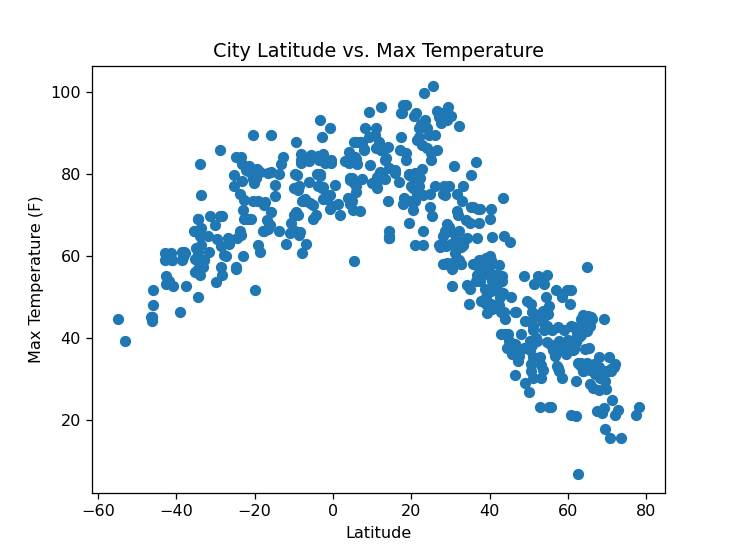

In [12]:
# Plot setup and properties
plt.figure(1,dpi=70)
plt.scatter(weather_data["Lat"], weather_data["Max Temp"])
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("../Images/Latitude vs. Temperature Plot.png")

## Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


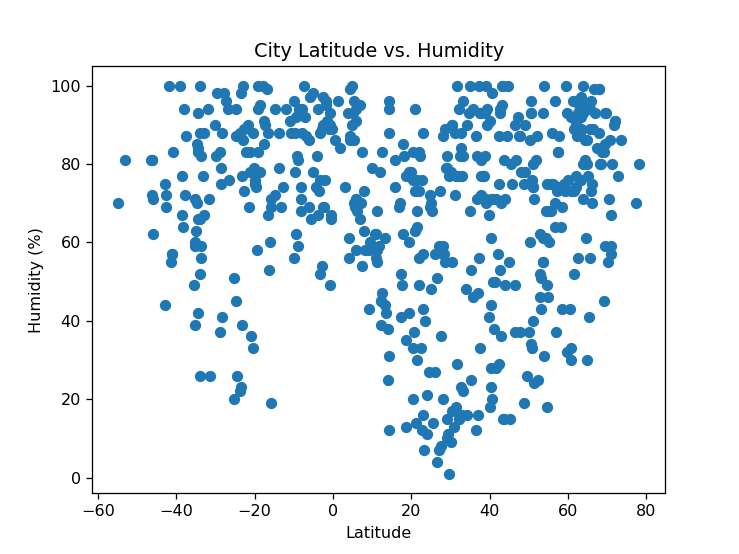

In [13]:
# Plot setup and properties
plt.figure(2,dpi=70)
plt.scatter(weather_data["Lat"], weather_data["Humidity"])
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../Images/Latitude vs. Humidity Plot.png")

## Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


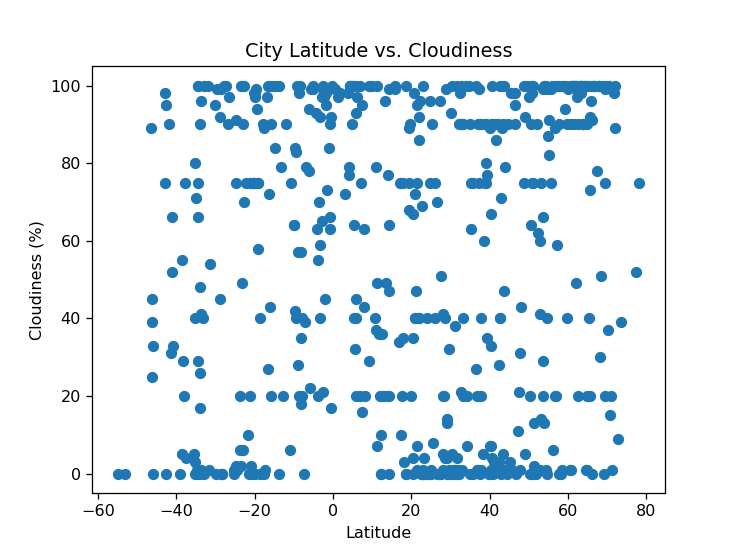

In [14]:
# Plot setup and properties
plt.figure(3,dpi=70)
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"])
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../Images/Latitude vs Cloudiness Plot.png")

## Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


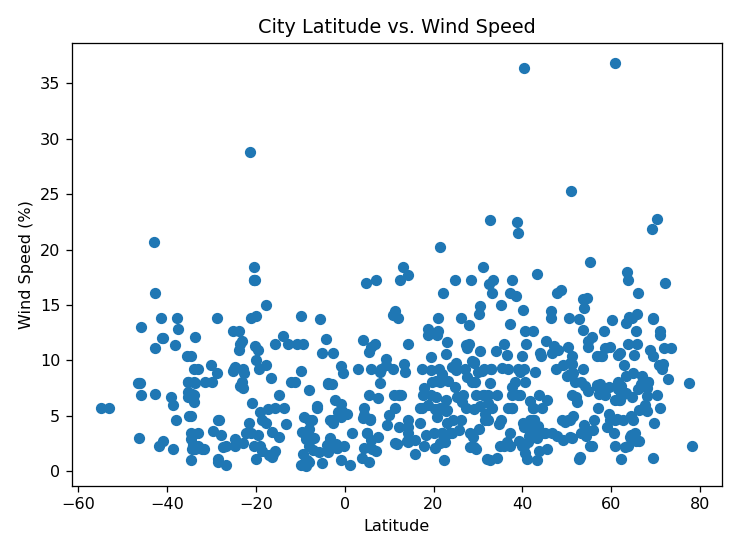

In [15]:
# Plot setup and properties
plt.figure(4,dpi=70)
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"])
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.tight_layout()
plt.savefig("../Images/Latitude vs Wind Speed Plot.png")

## Linear Regression

In [16]:
L=0
Northern_Lat = weather_data.query(f"Lat >= {0}")
Southern_Lat = weather_data.query(f"Lat <= {0}")


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8741227705041196


<IPython.core.display.Javascript object>


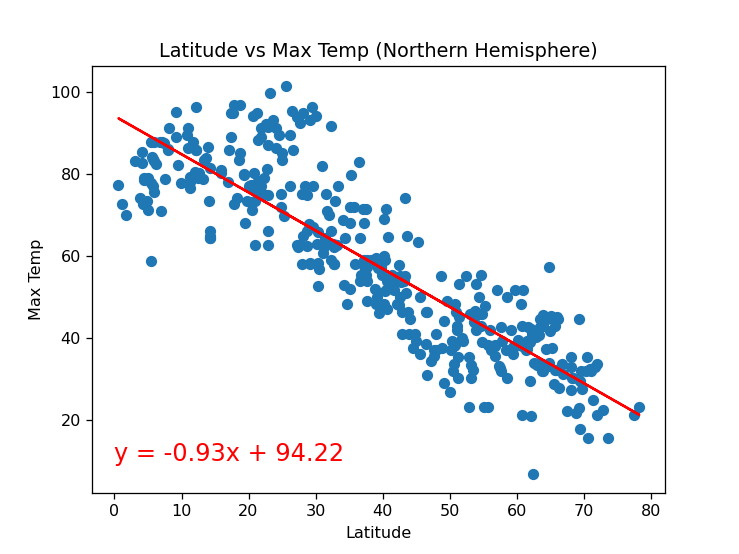

In [17]:
# Set x and y values
x_values=Northern_Lat['Lat']
y_values=Northern_Lat['Max Temp']

# Plot data values and formulas
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot properties
plt.figure(5,dpi=70)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title('Latitude vs Max Temp (Northern Hemisphere)')
plt.savefig("../Images/Latitude vs Max Temp (Northern Hemisphere)")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7162341408755458


<IPython.core.display.Javascript object>


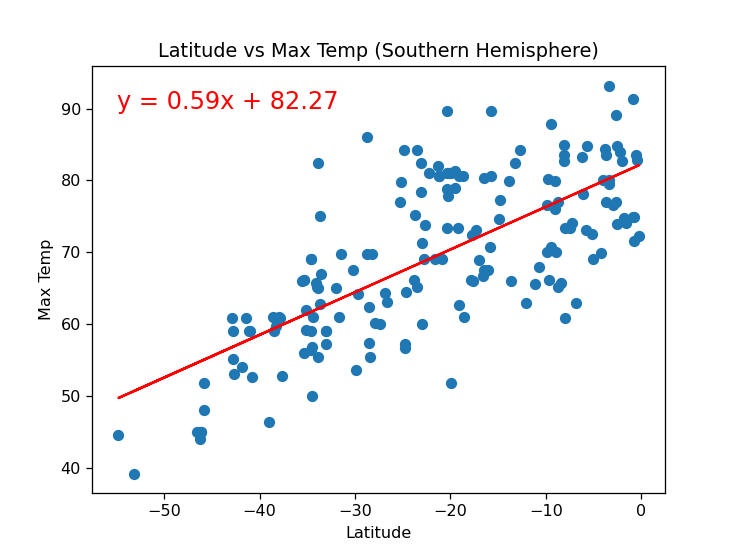

In [18]:
# Set x and y values
x_values=Southern_Lat['Lat']
y_values=Southern_Lat['Max Temp']

# Plot data values and formulas
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot properties
plt.figure(6,dpi=70)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,90),fontsize=15,color="red")
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title('Latitude vs Max Temp (Southern Hemisphere)')
plt.savefig("../Images/Latitude vs Max Temp (Southern Hemisphere)")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1797572902587795


<IPython.core.display.Javascript object>


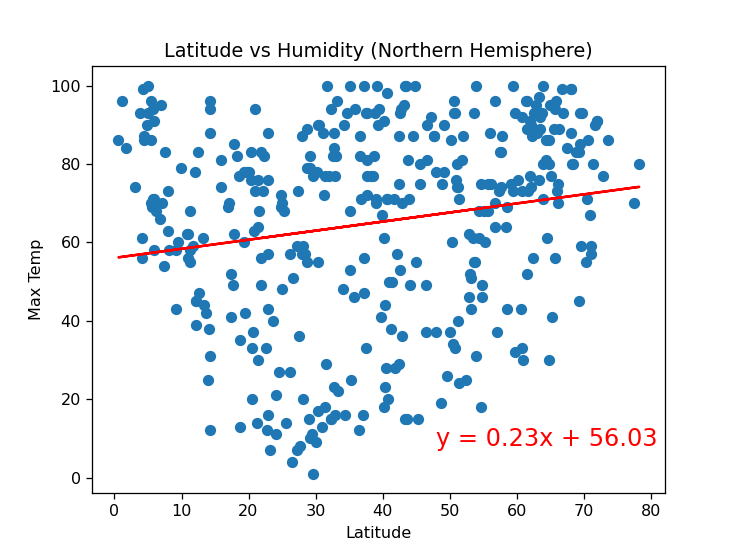

In [25]:
# Set x and y values
x_values=Northern_Lat['Lat']
y_values=Northern_Lat['Humidity']

# Plot data values and formulas
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot properties
plt.figure(7,dpi=70)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(48,8),fontsize=15,color="red")
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title('Latitude vs Humidity (Northern Hemisphere)')
plt.savefig("../Images/Latitude vs Humidity (Northern Hemisphere)")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.19881005627144652


<IPython.core.display.Javascript object>


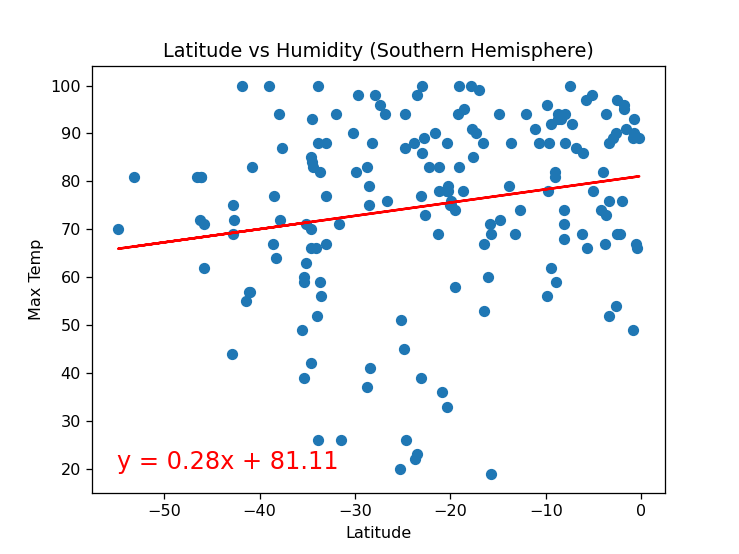

In [37]:
# Set x and y values
x_values=Southern_Lat['Lat']
y_values=Southern_Lat['Humidity']

# Plot data values and formulas
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot properties
plt.figure(8,dpi=70)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title('Latitude vs Humidity (Southern Hemisphere)')
plt.savefig("../Images/Latitude vs Humidity (Southern Hemisphere)")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.15122680512096534


<IPython.core.display.Javascript object>


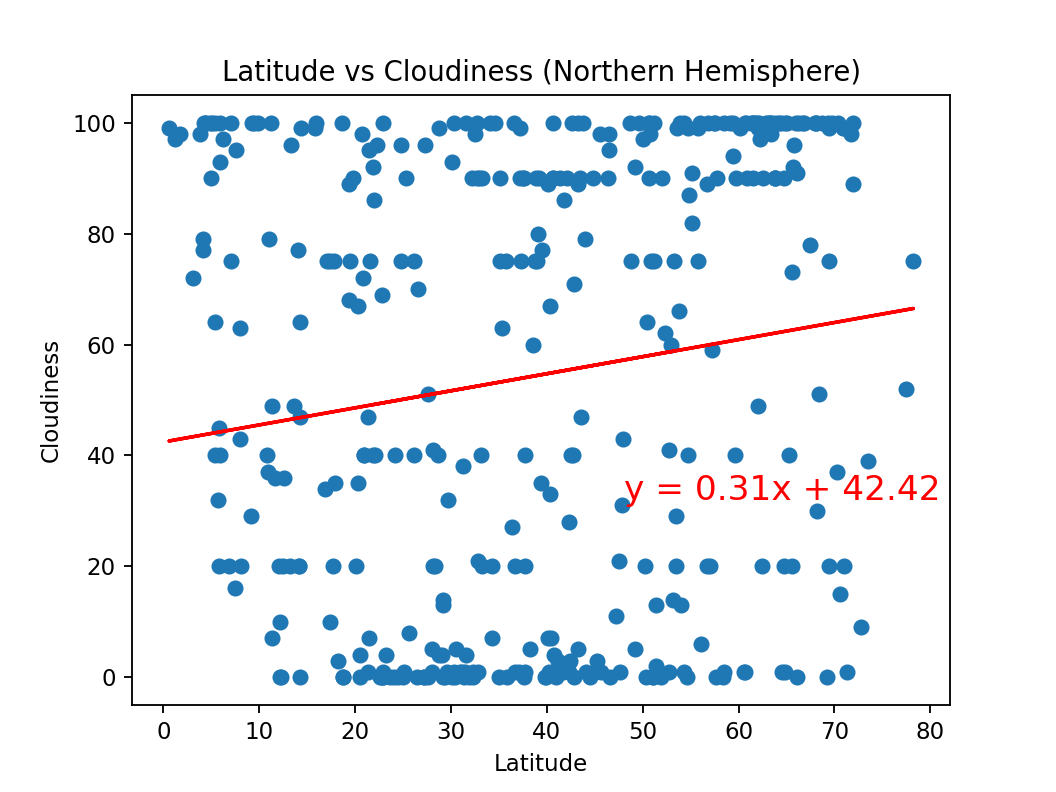

In [21]:
# Set x and y values
x_values=Northern_Lat['Lat']
y_values=Northern_Lat['Cloudiness']

# Plot data values and formulas
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot properties
plt.figure(9,dpi=100)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(48,32),fontsize=15,color="red")
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.title('Latitude vs Cloudiness (Northern Hemisphere)')
plt.savefig("../Images/Latitude vs Cloudiness (Northern Hemisphere)")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.26731324739700696


<IPython.core.display.Javascript object>


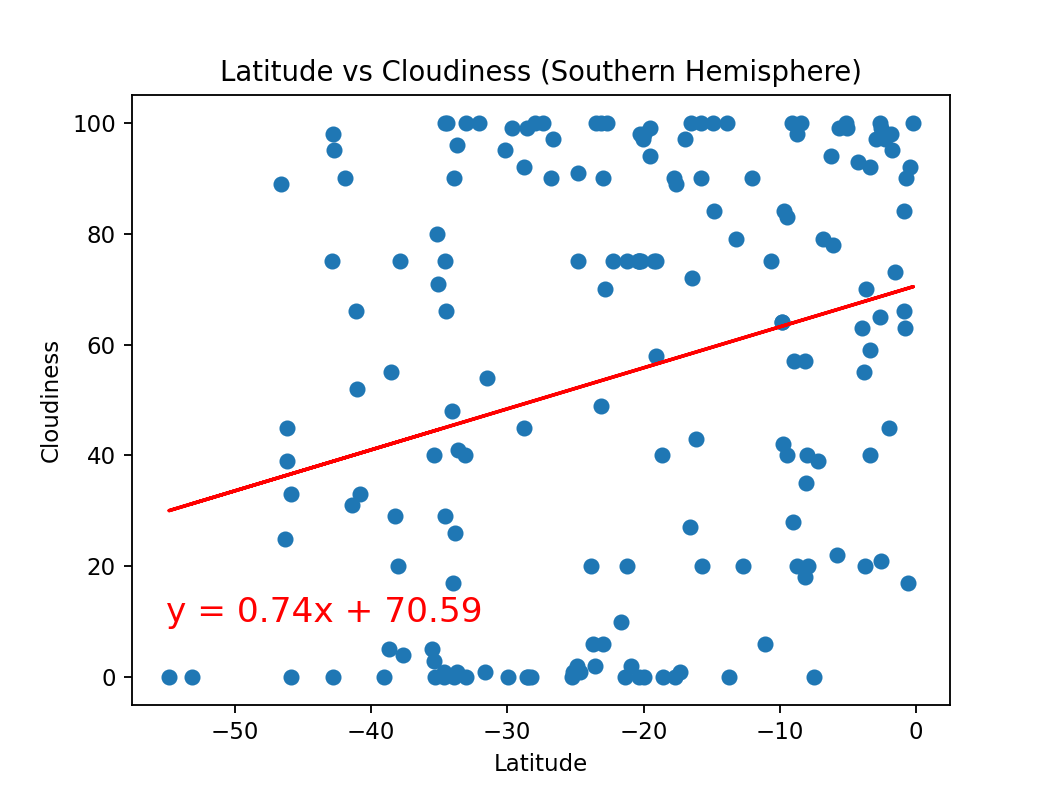

In [40]:
# Set x and y values
x_values=Southern_Lat['Lat']
y_values=Southern_Lat['Cloudiness']

# Plot data values and formulas
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot properties
plt.figure(10,dpi=100)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.title('Latitude vs Cloudiness (Southern Hemisphere)')
plt.savefig("../Images/Latitude vs Cloudiness (Southern Hemisphere)")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.11466292884303154


<IPython.core.display.Javascript object>


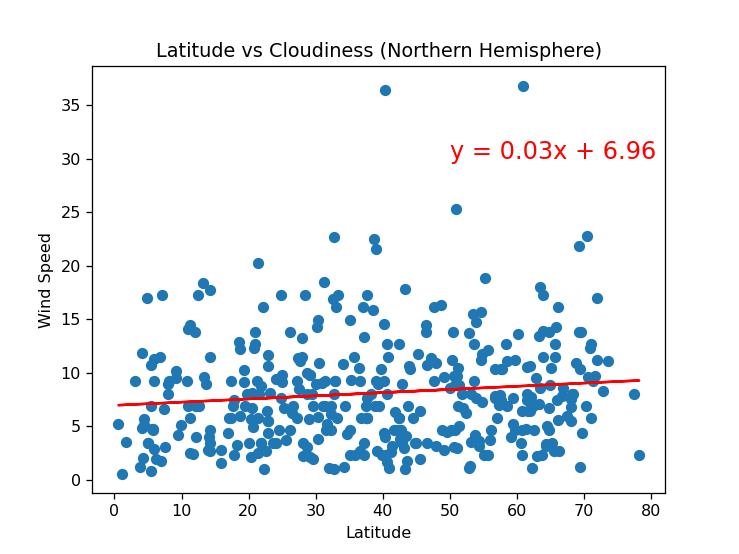

In [41]:
# Set x and y values
x_values=Northern_Lat['Lat']
y_values=Northern_Lat['Wind Speed']

# Plot data values and formulas
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot properties
plt.figure(11,dpi=70)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,30),fontsize=15,color="red")
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.title('Latitude vs Cloudiness (Northern Hemisphere)')
plt.savefig("../Images/Latitude vs Cloudiness (Northern Hemisphere)")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.19359158664749174


<IPython.core.display.Javascript object>


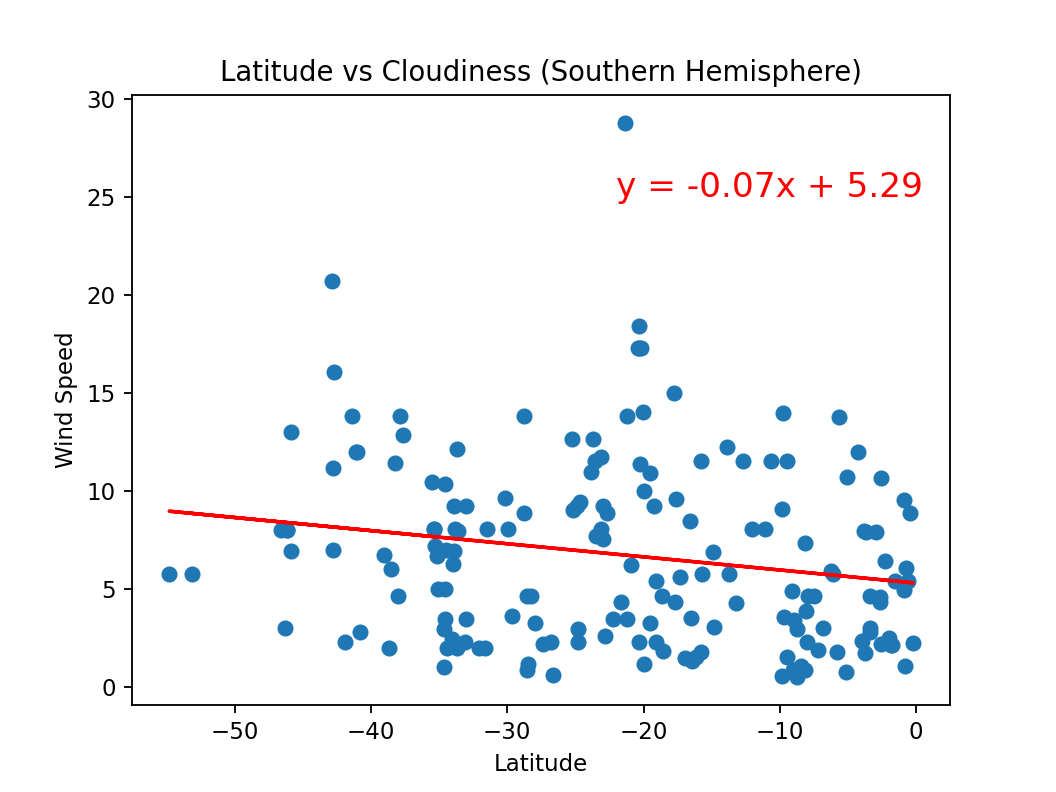

In [43]:
# Set x and y values
x_values=Southern_Lat['Lat']
y_values=Southern_Lat['Wind Speed']

# Plot data values and formulas
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot properties
plt.figure(12,dpi=100)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-22,25),fontsize=15,color="red")
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.title('Latitude vs Cloudiness (Southern Hemisphere)')
plt.savefig("../Images/Latitude vs Cloudiness (Northern Hemisphere)")